랜덤포레스트
  - 앙상블 기법 : 여러개를 모아서 하나의 성능을 내는 기법
  - 부트스트랩 샘플링 : 각 트리를 만들때 데이터를 랜덤하게 다양한 셈플로 학습
  - 랜덤한 특성 선택 : 분할할때 랜던하게 선택된 일부 특성만 고려

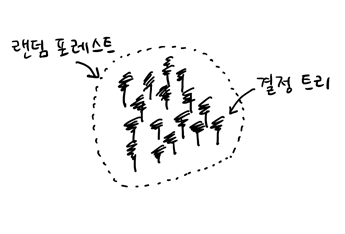

  - 과적합 방지 : 각 트리의 과적합을 완화시키는 역활
  - 안정성, 다양성 : 다양한데이터 와 특성을 사용

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
import pandas as pd
import numpy as np

In [10]:
from sklearn.datasets import load_wine
data = load_wine().data
target = load_wine().target
cols = load_wine().feature_names
wine = pd.DataFrame(data,columns=cols)

In [9]:
load_wine().feature_names

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [11]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [12]:
rf = RandomForestClassifier(n_jobs=-1,random_state=42)
scores =  cross_validate(rf,data,target,return_train_score=True,n_jobs=-1)
scores['train_score'].mean(), scores['test_score'].mean()

(1.0, 0.9720634920634922)

In [17]:
# 결정트리 단독 모델로 비교
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)
scores =  cross_validate(dt,data,target,return_train_score=True,n_jobs=-1)
scores['train_score'].mean(), scores['test_score'].mean()

(0.9747562296858071, 0.8987301587301587)

엑스트라 트리
  - 부트스트랩 샘플링 안함 : 전체데이터를 사용해서 각 트리를 구성
  - 랜던한 특성 선택의 강화
  - 분할기준의 강화 : 랜덤포레스트는 임계값을 기준, 특성들 중에서 가장 작은 분산을 가진 값을 선택 결국 더 강력한 분할을 선택

In [18]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_jobs=-1,random_state=42)
scores =  cross_validate(et,data,target,return_train_score=True,n_jobs=-1)
scores['train_score'].mean(), scores['test_score'].mean()

(1.0, 0.9777777777777779)

그레이디언트 부스팅(Gradient Boosting)
  - 부스팅(Boosting) : 약한학습기(Weak Learner) 를 여러개 여겨해서 강력한 모델을 만듦, 이전학습의 오차를 줄이는 방향으로 개선
  - 그레이디언트 디센트(Gradient Descent) : 손실함수의 값이 최소가 되도록 학습
  - 약한 학습기 활용: 각각의 트리모델의 깊이를 앝게 만듦
  - 학습률(Learning Rate):이전학습의 오차를 얼마나 크게 반영할지 조절하는 하이퍼 파라메터

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
scores =  cross_validate(gb,data,target,return_train_score=True,n_jobs=-1)
scores['train_score'].mean(), scores['test_score'].mean()

(1.0, 0.9385714285714286)

In [24]:
gb = GradientBoostingClassifier(n_estimators=1000,learning_rate=0.5, random_state=42)
scores =  cross_validate(gb,data,target,return_train_score=True,n_jobs=-1)
scores['train_score'].mean(), scores['test_score'].mean()

(1.0, 0.9441269841269841)

히스토그램 기반 부스팅
  - 히스토그램 기반 학습(histogram-based Learning): 데이터를 히스토그램으로 변환하여 구간별 데이터의 분포를 학습
  - 빠른속도
  - 적은 메모리사용
  - 병렬처리 : 데이터를 히스토그램으로 나누고 각 구간별 독립적으로 계산하기 때문에 병렬 처리가 가능

In [25]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(random_state=42)
scores =  cross_validate(hgb,data,target,return_train_score=True,n_jobs=-1)
scores['train_score'].mean(), scores['test_score'].mean()

(1.0, 0.9552380952380952)

중요 피처 찾기
  - 특성의 값을 무작위로 섞어보고 모델의 성능변화를 살펴본다 그리고 영향력을 추정한다.

In [28]:
from sklearn.inspection import permutation_importance
hgb.fit(data,target)
result = permutation_importance(hgb,data,target, n_repeats=10,random_state=42, n_jobs=-1)
result.importances_mean

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.11797753, 0.        , 0.        , 0.17921348,
       0.00505618, 0.        , 0.19662921])

사이킷런이 아닌 다른 패키지에 있는 앙상블
  - 현 시점에서 기계학습의 정점에 있는 모델
  - XGBoost, LightGBM

In [31]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
scores =  cross_validate(xgb,data,target,return_train_score=True,n_jobs=-1)
scores['train_score'].mean(), scores['test_score'].mean()

(1.0, 0.9498412698412698)

In [32]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
scores =  cross_validate(lgb,data,target,return_train_score=True,n_jobs=-1)
scores['train_score'].mean(), scores['test_score'].mean()

(1.0, 0.9665079365079364)

앙상블 리포트

In [38]:
d = {'model': [1, 2], 'accuracy_train': [3, 4],'accuracy_test': [3, 4]}
pd.DataFrame(data = d)

,model,accuracy_train,accuracy_test
0,1,3,3
1,2,4,4


In [50]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.2,random_state=42)
def makeEn(estimator):
  cv = StratifiedKFold(n_splits=10,shuffle=True)
  scores =  cross_validate(estimator,x_train,y_train,return_train_score=True,n_jobs=-1,cv=cv)
  return scores['train_score'].mean(), scores['test_score'].mean()
models = {
    'rfc' : RandomForestClassifier(),
    'extc' :  ExtraTreesClassifier(),
    'gbc' :  GradientBoostingClassifier(),
    'histbc' :  HistGradientBoostingClassifier(),
    'xgboost' : XGBClassifier(),
    'lightgbm' : LGBMClassifier()
}
result = []
for model in models.values():
  result.append(makeEn(model))

In [51]:
pd.DataFrame(result,columns=['train-acc','test-acc'],index = models.keys())

,train-acc,test-acc
rfc,1.0,0.978571
extc,1.0,0.978571
gbc,1.0,0.929524
histbc,1.0,0.950000
xgboost,1.0,0.958571
lightgbm,1.0,0.993333
